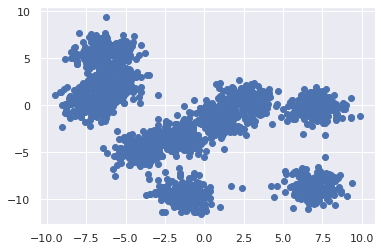

In [668]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

sns.set()

# X, y = make_blobs(n_samples=20000, centers=10, cluster_std=0.60, random_state=2)
X, y = make_blobs(n_samples=2000, centers=10, cluster_std=0.90, random_state=2)
plt.scatter(X[:, 0], X[:, 1])


In [669]:
final_center_point = pd.DataFrame()

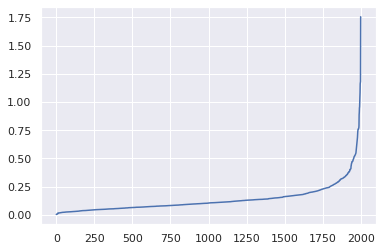

In [670]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [671]:
X

array([[-7.2979214 ,  0.57527412],
       [ 6.22000909, -0.59871643],
       [-4.59858173, -5.44464683],
       ...,
       [ 2.90598551,  1.61238252],
       [ 1.70381986, -1.36622531],
       [-7.58797884, -0.33297648]])

In [672]:
distances

array([0.00372304, 0.00372304, 0.0046598 , ..., 1.17224633, 1.18254586,
       1.75510711])

In [673]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

1988
0.790608196446263
***


In [674]:
eps

0.790608196446263

In [675]:
m = DBSCAN(eps=eps, min_samples=5)
m.fit(X)

DBSCAN(eps=0.790608196446263)

In [676]:
clusters = m.labels_
clusters

array([0, 1, 1, ..., 1, 1, 0])

In [677]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value

,0,1,cluster
0,-7.297921,0.575274,0
1,6.220009,-0.598716,1
2,-4.598582,-5.444647,1
3,2.700489,-1.859723,1
4,-2.960512,-5.507708,1
...,...,...,...
1995,-1.868289,-8.213525,2
1996,-7.697846,0.093832,0
1997,2.905986,1.612383,1
1998,1.703820,-1.366225,1


In [678]:
core_points = []
len(cluster_value.groupby('cluster'))

5

In [679]:
def calculate_density(cluster_values):
    cluster_density = []
    groups = cluster_values.groupby('cluster')
    for i in range(0, len(groups) - 1):
        arrays = groups.get_group(i).filter([0, 1]).to_numpy()
        fden = 0
        fz = 0
        for oi in arrays:
            noi = 0
            for oj in arrays:
                if dist(oi, oj) == 0:
                    fz += 1
                else:
                    if dist(oi, oj) < eps:
                        fz += dist(oi, oj)
                        noi += 1
            fden += noi / fz
        print(fden)
        cluster_density.append(fden)
    return cluster_density


dc = calculate_density(cluster_value)
dc

12.192986960978887
13.565052143037533
10.050420013942807
10.409687120927376


[12.192986960978887,
 13.565052143037533,
 10.050420013942807,
 10.409687120927376]

In [680]:
dc = np.array(dc)
dc.max()
max_density_cluster = np.where(dc == dc.max())[0][0]
max_density_cluster

1

In [681]:
def calculate_member_core_point(cluster_values, max_density_clusters):
    core_point_arrays = cluster_values.groupby('cluster').get_group(max_density_clusters).filter([0, 1]).to_numpy()
    max_core_point = []
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        max_core_point.append(point)
    return max_core_point


mcp = calculate_member_core_point(cluster_value, max_density_cluster)
mcp

[51,
 26,
 14,
 26,
 51,
 64,
 38,
 77,
 21,
 27,
 46,
 35,
 51,
 57,
 26,
 57,
 61,
 43,
 17,
 34,
 79,
 53,
 44,
 24,
 59,
 45,
 58,
 39,
 29,
 23,
 60,
 57,
 16,
 46,
 61,
 49,
 65,
 59,
 63,
 61,
 46,
 32,
 51,
 22,
 42,
 20,
 60,
 62,
 34,
 66,
 55,
 19,
 13,
 67,
 4,
 11,
 12,
 30,
 43,
 47,
 21,
 40,
 64,
 56,
 19,
 78,
 47,
 53,
 34,
 63,
 29,
 46,
 33,
 16,
 15,
 65,
 52,
 12,
 62,
 37,
 37,
 26,
 20,
 73,
 20,
 55,
 46,
 13,
 76,
 32,
 10,
 21,
 13,
 58,
 15,
 47,
 9,
 14,
 81,
 33,
 69,
 17,
 33,
 48,
 8,
 56,
 68,
 17,
 42,
 36,
 24,
 54,
 51,
 73,
 42,
 15,
 41,
 14,
 45,
 74,
 53,
 47,
 19,
 69,
 46,
 54,
 14,
 21,
 65,
 54,
 12,
 34,
 21,
 2,
 45,
 57,
 14,
 70,
 20,
 70,
 17,
 24,
 72,
 49,
 59,
 60,
 16,
 55,
 59,
 54,
 49,
 55,
 53,
 36,
 84,
 37,
 46,
 56,
 14,
 12,
 23,
 64,
 34,
 60,
 47,
 30,
 47,
 60,
 33,
 69,
 72,
 34,
 41,
 37,
 76,
 47,
 40,
 38,
 38,
 41,
 53,
 22,
 86,
 39,
 39,
 66,
 36,
 58,
 49,
 29,
 34,
 65,
 47,
 77,
 51,
 57,
 58,
 12,
 51,
 18,
 39,

In [682]:
def find_center_point(mcps, cluster_values, max_density_clusters):
    n_mcp = np.array(mcps)
    pos = np.where(n_mcp == n_mcp.max())
    positions = pos[0]

    if len(positions) > 1:
        core_points.append(positions)
    else:
        core_point = positions[0]
        for key in range(len(positions)):
            if key != len(positions) - 1:
                if dist(core_point, positions[key + 1]) < eps:
                    core_point = np.mean([np.array(core_point), np.array(positions[key + 1])])
        core_points.append(core_point)
    return cluster_values.groupby('cluster').get_group(max_density_clusters).filter([0, 1]).to_numpy()[positions[0]]


final_center_point = final_center_point.append(pd.DataFrame(find_center_point(mcp, cluster_value, max_density_cluster))[0])
final_center_point

,0,1
0,-3.821574,-4.383162


In [683]:
def create_region(cluster_values, region_number, center_point, digit_number=1):
    for i in range(0, len(cluster_values) - 1):
        if dist([cluster_values.loc[i, 0], cluster_values.loc[i, 1]], center_point) < digit_number + 1:
            cluster_values.loc[i, 'region'] = region_number
        else:
            cluster_values.loc[i, 'region'] = 0
    return cluster_values


cluster_value = create_region(cluster_value, 1, find_center_point(mcp, cluster_value, max_density_cluster),
                              len(str(int(dc.max()))))
final_region = pd.DataFrame()
final_region = final_region.append(cluster_value[cluster_value.region == 1], ignore_index=True)
final_region

,0,1,cluster,region
0,-4.598582,-5.444647,1,1.0
1,-2.960512,-5.507708,1,1.0
2,-1.192030,-3.710343,1,1.0
3,-3.201579,-2.654970,1,1.0
4,-4.782205,-5.545525,1,1.0
...,...,...,...,...
338,-1.256740,-3.319565,1,1.0
339,-1.102223,-3.355566,1,1.0
340,-1.761975,-3.189939,1,1.0
341,-3.014707,-3.236448,1,1.0


In [684]:
cluster_value

,0,1,cluster,region
0,-7.297921,0.575274,0,0.0
1,6.220009,-0.598716,1,0.0
2,-4.598582,-5.444647,1,1.0
3,2.700489,-1.859723,1,0.0
4,-2.960512,-5.507708,1,1.0
...,...,...,...,...
1995,-1.868289,-8.213525,2,0.0
1996,-7.697846,0.093832,0,0.0
1997,2.905986,1.612383,1,0.0
1998,1.703820,-1.366225,1,0.0


In [685]:
new_X = cluster_value[cluster_value.region == 0].loc[:, 0:1]
new_m = DBSCAN(eps=eps, min_samples=5)
new_m.fit(new_X)
new_clusters = new_m.labels_
new_cluster_value = pd.concat([pd.DataFrame(np.array(new_X)), pd.DataFrame(new_clusters, columns=['cluster'])], axis=1)

new_dc = calculate_density(new_cluster_value)
new_dc = np.array(new_dc)
new_max_density_cluster = np.where(new_dc == new_dc.max())[0][0]

new_mcp = calculate_member_core_point(new_cluster_value, new_max_density_cluster)
final_center_point = final_center_point.append(pd.DataFrame(find_center_point(new_mcp, new_cluster_value, new_max_density_cluster))[0])
new_cluster_value_region = create_region(new_cluster_value, 2,
                                         find_center_point(new_mcp, new_cluster_value, new_max_density_cluster),
                                         len(str(int(new_dc.max()))))

12.186003225085246
12.43742806501681
10.05130446787867
10.409687120927376


In [686]:
final_region = final_region.append(new_cluster_value_region[new_cluster_value_region.region == 2], ignore_index=True)
final_region

,0,1,cluster,region
0,-4.598582,-5.444647,1,1.0
1,-2.960512,-5.507708,1,1.0
2,-1.192030,-3.710343,1,1.0
3,-3.201579,-2.654970,1,1.0
4,-4.782205,-5.545525,1,1.0
...,...,...,...,...
725,0.408965,-3.478980,1,2.0
726,0.716047,-2.489576,1,2.0
727,1.266161,-2.040440,1,2.0
728,2.270824,1.129814,1,2.0


In [687]:
new_cluster_value_region = new_cluster_value_region[new_cluster_value_region.region != 2]
new_cluster_value_region

,0,1,cluster,region
0,-7.297921,0.575274,0,0.0
1,6.220009,-0.598716,1,0.0
3,-6.219933,1.816893,0,0.0
5,-1.623467,-9.421635,2,0.0
6,-7.405793,2.705590,0,0.0
...,...,...,...,...
1650,-0.729895,-9.438302,2,0.0
1652,-1.868289,-8.213525,2,0.0
1653,-7.697846,0.093832,0,0.0
1654,2.905986,1.612383,1,0.0


In [688]:
i = 3
while len(new_cluster_value_region) > 5:
    print(len(new_cluster_value_region))
    new_X = new_cluster_value_region.loc[:, 0:1]
    new_m = DBSCAN(eps=eps, min_samples=5)
    new_m.fit(new_X)
    new_clusters = new_m.labels_
    new_cluster_value = pd.concat([pd.DataFrame(np.array(new_X)), pd.DataFrame(new_clusters, columns=['cluster'])],
                                  axis=1)
    new_dc = calculate_density(new_cluster_value)
    new_dc = np.array(new_dc)
    new_max_density_cluster = np.where(new_dc == new_dc.max())[0][0]

    new_mcp = calculate_member_core_point(new_cluster_value, new_max_density_cluster)
    new_cluster_value_region = create_region(new_cluster_value, i,
                                             find_center_point(new_mcp, new_cluster_value, new_max_density_cluster),
                                             len(str(int(new_dc.max()))))
    final_center_point = final_center_point.append(pd.DataFrame(find_center_point(new_mcp, new_cluster_value, new_max_density_cluster))[0])
    final_region = final_region.append(new_cluster_value_region[new_cluster_value_region.region == i],
                                       ignore_index=True)
    new_cluster_value_region = new_cluster_value_region[new_cluster_value_region.region != i]
    i += 1

1269
12.186003225085246
10.42277809706477
10.05130446787867
10.409687120927376
4.612271256018638
877
10.42277809706477
10.05130446787867
7.361943482088448
10.409687120927376
10.777913726741689
4.612271256018638
710
10.42277809706477
10.05130446787867
7.361943482088448
10.409687120927376
4.612271256018638
508
10.05130446787867
7.361943482088448
10.409687120927376
8.429862750064055
4.612271256018638
309
10.05130446787867
7.361943482088448
8.429862750064055
4.612271256018638
112
7.361943482088448
8.429862750064055
4.612271256018638
71
7.361943482088448
4.612271256018638
38
4.612271256018638
23


ValueError: zero-size array to reduction operation maximum which has no identity

In [689]:
final_region

,0,1,cluster,region
0,-4.598582,-5.444647,1,1.0
1,-2.960512,-5.507708,1,1.0
2,-1.192030,-3.710343,1,1.0
3,-3.201579,-2.654970,1,1.0
4,-4.782205,-5.545525,1,1.0
...,...,...,...,...
1971,-0.436535,-3.982422,0,10.0
1972,-0.207782,-4.120472,0,10.0
1973,0.131467,-4.887668,0,10.0
1974,-0.025542,-5.466033,0,10.0


In [690]:
dist([-8.05692981, 0.1895375], [-6.22434531, 3.0834089])

3.425325915789358

In [691]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

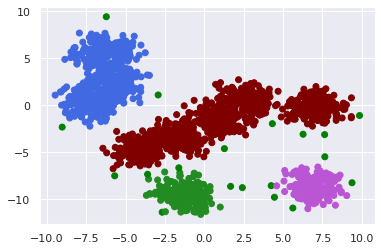

In [692]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [693]:
final_region[0].to_numpy()

array([-4.59858173, -2.96051216, -1.19202976, ...,  0.13146704,
       -0.02554186,  1.28006716])

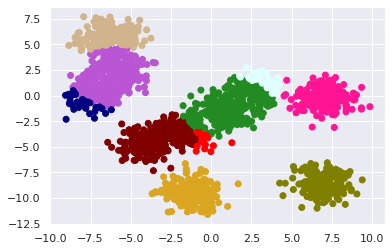

In [694]:
plt.scatter(final_region[0].to_numpy(), final_region[1].to_numpy(),
            c=vectorizer(final_region['region'].to_numpy().astype(int)))

In [695]:
final_center_point

,0,1
0,-3.821574,-4.383162
0,1.118310,-1.186047
0,-5.854935,1.857328
0,-6.049564,5.824067
0,7.070133,-0.267108
0,7.150259,-8.768132
0,-0.905682,-9.533538
0,2.999809,1.821518
0,-8.092937,-0.757682
0,-0.365201,-4.790786


In [696]:
len(final_center_point)

10

In [697]:
kmeans = KMeans(len(final_center_point))
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([8, 5, 3, ..., 9, 2, 8], dtype=int32)

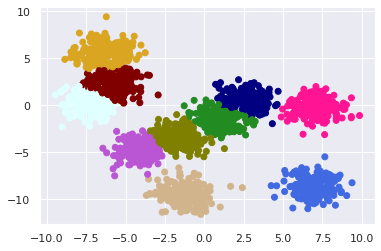

In [698]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))